In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('../Data/ratings_Electronics.csv', names=['userId', 'productId','rating','timestamp'])

In [97]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [98]:
df.shape

(7824482, 4)

In [99]:
df.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [100]:
df.dtypes

userId        object
productId     object
rating       float64
timestamp      int64
dtype: object

In [101]:
df = df.drop('timestamp', axis=1)

In [102]:
df.rating.unique()

array([5., 1., 3., 2., 4.])

<AxesSubplot:xlabel='rating', ylabel='count'>

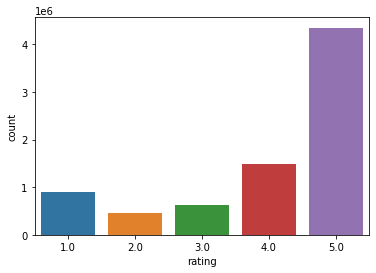

In [103]:
sns.countplot(data=df, x='rating')

In [104]:
# To downsize the problem. Lets take a sample of the data
df = df.sample(frac=0.5)

In [105]:
df.shape

(3912241, 3)

<AxesSubplot:xlabel='rating', ylabel='count'>

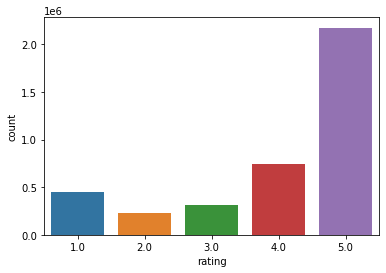

In [106]:
sns.countplot(data=df, x='rating')

In [107]:
df.userId.nunique()

2549914

In [108]:
df.productId.nunique()

360614

In [109]:
df.userId.value_counts()

A3OXHLG6DIBRW8    271
A5JLAU2ARJ0BO     259
ADLVFFE4VBT8      255
A680RUE1FDO8B     215
A6FIAB28IS79      214
                 ... 
A2IWQ5OFLTFIS7      1
A26LTSEM96W94X      1
A2WZWY5MQTXO0R      1
A1Y8WGEK4YBQXA      1
A2NRNUFL3LW55V      1
Name: userId, Length: 2549914, dtype: int64

In [110]:
frequent_raters = df.userId.value_counts()
frequent_raters = frequent_raters[frequent_raters>50]

In [111]:
new_df = df[df.userId.isin(frequent_raters.index)]

In [112]:
new_df.shape

(22080, 3)

In [113]:
utility_matrix = pd.pivot_table(data=new_df, index='userId', columns='productId', values='rating').fillna(0)

In [114]:
utility_matrix.head()

productId,0970407998,1400501776,1400532620,1400532655,1400599997,1400699169,1685560148,7562434166,787988002X,8862936826,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10NMELR4KX0J6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10Y058K7B96C6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10ZFE6YE0UHW8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
utility_matrix.shape

(285, 13824)

In [116]:
non_zero_items = utility_matrix[utility_matrix!=0].sum(1).sum()
print(non_zero_items)

94177.0


In [117]:
total_possible_items = utility_matrix.shape[0] * utility_matrix.shape[1]
print(total_possible_items)

3939840


In [118]:
sparsity = 1 - (non_zero_items/total_possible_items)
print(sparsity)

0.9760962374106563


## Popularity based recommendation 

In [119]:
new_df.head()

,userId,productId,rating
7250260,A3PD8JD9L4WEII,B00CEYDAZ2,5.0
1787552,A11I1I9QLMAM1A,B00189HR4Y,3.0
7824039,ADLVFFE4VBT8,B00L1I80K2,5.0
1182819,A38RMU1Y5TDP9,B000MX3SMC,4.0
7198369,A2NOW4U7W3F7RI,B00C0TH1HO,5.0


In [120]:
product_grp = new_df.groupby('productId')['userId'].count().to_frame().reset_index()
product_grp.columns = ['productId', 'score']
product_grp = product_grp.sort_values(by='score',ascending=False)

In [121]:
product_grp.head()

,productId,score
10872,B0088CJT4U,39
6372,B002R5AM7C,32
10777,B00829THK0,32
7137,B003ES5ZUU,30
3194,B000N99BBC,30


In [122]:
product_grp.score.value_counts()

1     10188
2      1889
3       800
4       400
5       204
6       105
7        68
8        49
9        32
10       21
11       12
12        9
13        9
15        8
14        6
19        6
16        3
18        3
30        3
32        2
17        2
21        1
22        1
25        1
26        1
39        1
Name: score, dtype: int64

In [123]:
product_grp['Rank'] = product_grp.score.rank(ascending=0, method='first')

In [124]:
product_grp.head()

,productId,score,Rank
10872,B0088CJT4U,39,1.0
6372,B002R5AM7C,32,2.0
10777,B00829THK0,32,3.0
7137,B003ES5ZUU,30,4.0
3194,B000N99BBC,30,5.0


These are the most popular items. We can recommend the users these products as a starting point

## Collaborative filtering

In [311]:
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise import KNNWithMeans
import os
from surprise.model_selection import train_test_split
from collections import defaultdict

In [312]:
new_df.head()

,userId,productId,rating
7250260,A3PD8JD9L4WEII,B00CEYDAZ2,5.0
1787552,A11I1I9QLMAM1A,B00189HR4Y,3.0
7824039,ADLVFFE4VBT8,B00L1I80K2,5.0
1182819,A38RMU1Y5TDP9,B000MX3SMC,4.0
7198369,A2NOW4U7W3F7RI,B00C0TH1HO,5.0


In [313]:
reader = Reader()
data = Dataset.load_from_df(new_df, reader)

In [314]:
train, test = train_test_split(data, test_size=0.3, random_state=101)

In [315]:
train

In [316]:
test[:5]

[('A3R19YKNL641X3', 'B00HSTFKCY', 4.0),
 ('A203OCQQ12MAVT', 'B00014K3V6', 5.0),
 ('A32O5FZH994CNY', 'B001UHMB5O', 4.0),
 ('A1KD8NJPZ01R37', 'B00005Q5X0', 2.0),
 ('A3L9E0YI7C5G0W', 'B00020S7XK', 5.0)]

In [317]:
# Nearest neightbour model
model = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
model.fit(train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [318]:
preds = model.test(test)

In [319]:
preds[5]

Prediction(uid='A22CW0ZHY3NJH8', iid='B000BRO3PA', r_ui=4.0, est=4.268439440993789, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [320]:
pred = pd.DataFrame(preds)

In [321]:
pred.shape

(6624, 5)

In [322]:
pred.head()

,uid,iid,r_ui,est,details
0,A3R19YKNL641X3,B00HSTFKCY,4.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
1,A203OCQQ12MAVT,B00014K3V6,5.0,4.444444,"{'actual_k': 0, 'was_impossible': False}"
2,A32O5FZH994CNY,B001UHMB5O,4.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
3,A1KD8NJPZ01R37,B00005Q5X0,2.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
4,A3L9E0YI7C5G0W,B00020S7XK,5.0,4.472222,"{'actual_k': 0, 'was_impossible': False}"


In [323]:
pred.uid.nunique()

285

In [324]:
pred.iid.nunique()

5340

In [325]:
pred

,uid,iid,r_ui,est,details
0,A3R19YKNL641X3,B00HSTFKCY,4.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
1,A203OCQQ12MAVT,B00014K3V6,5.0,4.444444,"{'actual_k': 0, 'was_impossible': False}"
2,A32O5FZH994CNY,B001UHMB5O,4.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
3,A1KD8NJPZ01R37,B00005Q5X0,2.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
4,A3L9E0YI7C5G0W,B00020S7XK,5.0,4.472222,"{'actual_k': 0, 'was_impossible': False}"
...,...,...,...,...,...
6619,A2SKEQT0WTB954,B0056KEPVO,5.0,4.541667,"{'actual_k': 0, 'was_impossible': False}"
6620,A2Y739CRM15WDL,B009WZRBPQ,4.0,3.973684,"{'actual_k': 0, 'was_impossible': False}"
6621,A2HMF8ZR67BNZS,B000MX48VM,4.0,4.767442,"{'actual_k': 0, 'was_impossible': False}"
6622,A3FEGTOLCWXSV4,B000TXNS6G,5.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."


In [326]:
# Selecting the 5 largest product id scores for each user
knn = pred.groupby(['uid'])['est'].nlargest(5).reset_index()['level_1'].to_list()

In [327]:
knn = pred.iloc[knn]

In [328]:
# Recommendation
knn[knn.uid=='A231WM2Z2JL0U3']

,uid,iid,r_ui,est,details
2492,A231WM2Z2JL0U3,B000066E70,5.0,5.000000,"{'actual_k': 1, 'was_impossible': False}"
3003,A231WM2Z2JL0U3,B0001G6U5M,5.0,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1014,A231WM2Z2JL0U3,B00004THDE,5.0,4.342857,"{'actual_k': 0, 'was_impossible': False}"
4915,A231WM2Z2JL0U3,B00006LV79,3.0,4.342857,"{'actual_k': 0, 'was_impossible': False}"
5715,A231WM2Z2JL0U3,B00007KDVI,5.0,4.342857,"{'actual_k': 0, 'was_impossible': False}"


In [329]:
pred[pred.uid=='A231WM2Z2JL0U3'].sort_values(by='est')

,uid,iid,r_ui,est,details
42,A231WM2Z2JL0U3,B00005OMZN,3.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
4147,A231WM2Z2JL0U3,B00003CWCI,4.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
4175,A231WM2Z2JL0U3,B000063CWO,4.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
4302,A231WM2Z2JL0U3,B0000630TO,5.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
4491,A231WM2Z2JL0U3,B00004XO1V,5.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
4566,A231WM2Z2JL0U3,B00006LS92,3.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
4741,A231WM2Z2JL0U3,B00005KAMS,3.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
3856,A231WM2Z2JL0U3,B00006JKXN,4.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
4903,A231WM2Z2JL0U3,B00005MEMN,4.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."
5356,A231WM2Z2JL0U3,B00004U9NP,4.0,4.268439,"{'was_impossible': True, 'reason': 'User and/o..."


In [330]:
# get RMSE
accuracy.rmse(model.test(test), verbose=True)

RMSE: 1.0365


1.036478881772479

In [331]:
uid = "A231WM2Z2JL0U3" 
iid = "B00004RC2D" 
model.predict(uid, iid, r_ui=0.0, verbose=True)

user: A231WM2Z2JL0U3 item: B00004RC2D r_ui = 0.00   est = 4.00   {'actual_k': 1, 'was_impossible': False}


Prediction(uid='A231WM2Z2JL0U3', iid='B00004RC2D', r_ui=0.0, est=4.0, details={'actual_k': 1, 'was_impossible': False})